# Paris

This notebook illustrates the hierarchical clustering of graphs by the [Paris algorithm](https://scikit-network.readthedocs.io/en/latest/reference/hierarchy.html).

In [1]:
import numpy as np
%matplotlib inline
from scipy.cluster.hierarchy import dendrogram as show_dendrogram

import networkx as nx
import sknetwork as skn

In [2]:
COLORS = ['r', 'b', 'g', 'c', 'm', 'y']

## Undirected graphs

**Loading**

In [3]:
adjacency = skn.data.karate_club()

**Clustering**

In [4]:
paris = skn.hierarchy.Paris(engine='python')

In [5]:
dendrogram = paris.fit_transform(adjacency)

**Visualization**

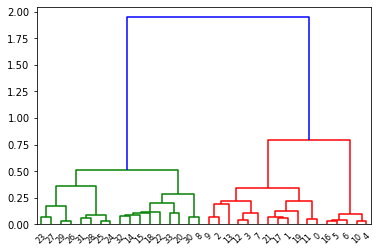

In [6]:
# Warning: If the image does not appear, run the cell again.
_ = show_dendrogram(dendrogram)

**Cuts of the dendrogram**

In [7]:
# default = 2 clusters
labels = skn.hierarchy.cut_straight(dendrogram)
print(labels)

[1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0]


In [8]:
# cut with 4 clusters
labels = skn.hierarchy.cut_straight(dendrogram, n_clusters = 4)
print(labels)

[0 0 0 0 3 3 3 0 1 0 3 0 0 0 1 1 3 0 1 0 1 0 1 2 2 2 2 2 2 2 1 2 1 1]


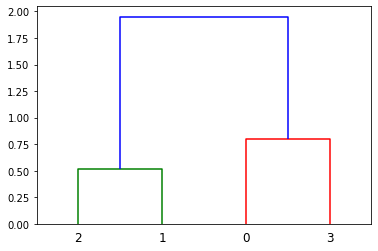

In [9]:
labels, dendrogram_new = skn.hierarchy.cut_straight(dendrogram, n_clusters = 4, return_dendrogram=True)
_ = show_dendrogram(dendrogram_new)

**Visualization**

In [10]:
graph = nx.from_scipy_sparse_matrix(adjacency)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:402: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(alpha, collections.Iterable):
/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


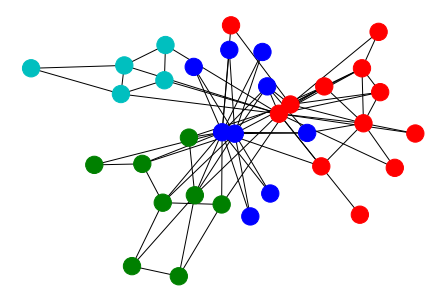

In [11]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, node_color=[COLORS[labels[i]] for i in graph])

**Metrics**

In [12]:
skn.hierarchy.dasgupta_score(adjacency, dendrogram)

0.6666666666666667

In [13]:
skn.hierarchy.tree_sampling_divergence(adjacency, dendrogram)

0.4873296566055281

**Parameters**

In [14]:
# default engine = numba if available
paris = skn.hierarchy.Paris()
paris.fit(adjacency)

Paris(engine='numba', weights='degree', reorder=True)

## Directed graphs

**Loading**

In [15]:
adjacency, names = skn.data.painters(return_labels=True)

**Clustering**

In [16]:
paris = skn.hierarchy.Paris(engine='python')

In [17]:
dendrogram = paris.fit_transform(adjacency)

**Visualization**

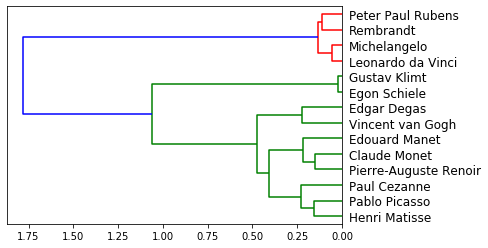

In [18]:
# Warning: If the image does not appear, run the cell again.
_ = show_dendrogram(dendrogram, labels = list(names.values()), orientation = 'left')

**Cuts of the dendrogram**

In [19]:
# cut with 3 clusters
labels = skn.hierarchy.cut_straight(dendrogram, n_clusters = 3)
print(labels)

[0 0 1 0 1 1 2 0 0 1 0 0 0 2]


In [20]:
unique_labels, counts = np.unique(labels, return_counts = True)
print(unique_labels, counts)

[0 1 2] [8 4 2]


**Visualization**

In [21]:
graph = nx.from_scipy_sparse_matrix(adjacency)

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


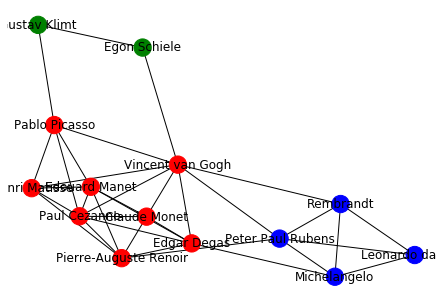

In [22]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, node_color=[COLORS[labels[i]] for i in graph], labels = names)

**Metrics**

In [23]:
skn.hierarchy.dasgupta_score(adjacency, dendrogram)

0.5842857142857143

In [24]:
skn.hierarchy.tree_sampling_divergence(adjacency, dendrogram)

0.4685697020629489

## Bipartite graphs

**Loading**

In [25]:
biadjacency, movies, actors = skn.data.movie_actor(return_labels=True)

**Clustering**

In [42]:
biparis = skn.hierarchy.BiParis()
biparis.fit(biadjacency)
dendrogram = biparis.dendrogram_full_

**Cuts of the dendrogram**

In [43]:
labels = skn.hierarchy.cut_straight(dendrogram, n_clusters = 4)
n1, n2 = biadjacency.shape
labels_row = labels[:n1]
labels_col = labels[n1:]

In [45]:
unique_labels, counts_row = np.unique(labels_row, return_counts = True)
_, counts_col = np.unique(labels_col, return_counts=True)
print(unique_labels, counts_row, counts_col)

[0 1 2 3] [6 4 3 2] [7 4 3 2]


**Visualization**

In [46]:
adjacency = skn.utils.bipartite2undirected(biadjacency)

In [47]:
graph = nx.from_scipy_sparse_matrix(adjacency)

In [48]:
pos = {i: (0, i) for i in range(n1)} 
pos.update({n1 + i: (2, i) for i in range(n2)})
pos_labels = {i: (0.5, i) for i in range(n1)} 
pos_labels.update({n1 + i: (1.5, i) for i in range(n2)})

In [49]:
names = movies
names.update({n1 + i: actors[i] for i in actors})

/usr/local/Cellar/python/3.7.4_1/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


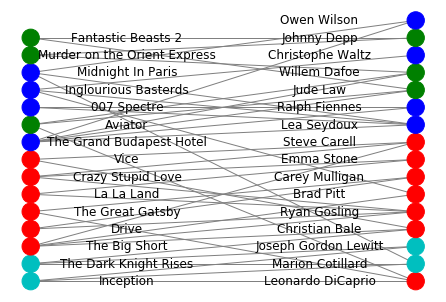

In [51]:
# Warning: If the image does not appear, run the cell again.
nx.draw(graph, pos, node_color=[COLORS[labels[i] % len(COLORS)] for i in graph], edge_color='grey')
_ = nx.draw_networkx_labels(graph, pos_labels, labels=names)

